In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [5]:
path = r'/Users/alexanderkell/Documents/SGI/Projects/11-starter-kits/data/processed/scenarios/Kenya/base/objective_data/adhoc/'
all_files = glob.glob(path + "/*.csv")

newcapa = []
retrofit = []

for filename in all_files:
    if "newcapa" in filename:
        df = pd.read_csv(filename, index_col=None, header=0)
        newcapa.append(df)
    else:
        df = pd.read_csv(filename, index_col=None, header=0)
        retrofit.append(df)

retrofit_df = pd.concat(retrofit, axis=0, ignore_index=True)
newcapa_df = pd.concat(newcapa, axis=0, ignore_index=True)
newcapa_df

,Unnamed: 0,region,year,agent,replacement_,asset_,month,day,hour,LCOE,category,name
0,0,Kenya,2035,528fc03b-57e8-4752-9280-d8d9910e825f,Biomass Power Plant,Biomass Power Plant,autumn,all-week,day,26.511358,newcapa,A1
1,1,Kenya,2035,528fc03b-57e8-4752-9280-d8d9910e825f,Biomass Power Plant,Biomass Power Plant,autumn,all-week,night,26.511358,newcapa,A1
2,2,Kenya,2035,528fc03b-57e8-4752-9280-d8d9910e825f,Biomass Power Plant,Biomass Power Plant,spring,all-week,day,26.511358,newcapa,A1
3,3,Kenya,2035,528fc03b-57e8-4752-9280-d8d9910e825f,Biomass Power Plant,Biomass Power Plant,spring,all-week,night,26.511358,newcapa,A1
4,4,Kenya,2035,528fc03b-57e8-4752-9280-d8d9910e825f,Biomass Power Plant,Biomass Power Plant,summer,all-week,day,26.511358,newcapa,A1
...,...,...,...,...,...,...,...,...,...,...,...,...
5179,1291,Kenya,2050,528fc03b-57e8-4752-9280-d8d9910e825f,Solar PV (Utility),Solar PV (Utility),spring,all-week,night,inf,newcapa,A1
5180,1292,Kenya,2050,528fc03b-57e8-4752-9280-d8d9910e825f,Solar PV (Utility),Solar PV (Utility),summer,all-week,day,9.132271,newcapa,A1
5181,1293,Kenya,2050,528fc03b-57e8-4752-9280-d8d9910e825f,Solar PV (Utility),Solar PV (Utility),summer,all-week,night,inf,newcapa,A1
5182,1294,Kenya,2050,528fc03b-57e8-4752-9280-d8d9910e825f,Solar PV (Utility),Solar PV (Utility),winter,all-week,day,8.426150,newcapa,A1


In [10]:
newcapa_dropped = newcapa_df.drop_duplicates(subset=["year","agent","replacement_","month","day","hour"])
newcapa_dropped

,Unnamed: 0,region,year,agent,replacement_,asset_,month,day,hour,LCOE,category,name
0,0,Kenya,2035,528fc03b-57e8-4752-9280-d8d9910e825f,Biomass Power Plant,Biomass Power Plant,autumn,all-week,day,26.511358,newcapa,A1
1,1,Kenya,2035,528fc03b-57e8-4752-9280-d8d9910e825f,Biomass Power Plant,Biomass Power Plant,autumn,all-week,night,26.511358,newcapa,A1
2,2,Kenya,2035,528fc03b-57e8-4752-9280-d8d9910e825f,Biomass Power Plant,Biomass Power Plant,spring,all-week,day,26.511358,newcapa,A1
3,3,Kenya,2035,528fc03b-57e8-4752-9280-d8d9910e825f,Biomass Power Plant,Biomass Power Plant,spring,all-week,night,26.511358,newcapa,A1
4,4,Kenya,2035,528fc03b-57e8-4752-9280-d8d9910e825f,Biomass Power Plant,Biomass Power Plant,summer,all-week,day,26.511358,newcapa,A1
...,...,...,...,...,...,...,...,...,...,...,...,...
5115,1227,Kenya,2050,528fc03b-57e8-4752-9280-d8d9910e825f,Solar PV (Utility),Biomass Power Plant,spring,all-week,night,inf,newcapa,A1
5116,1228,Kenya,2050,528fc03b-57e8-4752-9280-d8d9910e825f,Solar PV (Utility),Biomass Power Plant,summer,all-week,day,9.132271,newcapa,A1
5117,1229,Kenya,2050,528fc03b-57e8-4752-9280-d8d9910e825f,Solar PV (Utility),Biomass Power Plant,summer,all-week,night,inf,newcapa,A1
5118,1230,Kenya,2050,528fc03b-57e8-4752-9280-d8d9910e825f,Solar PV (Utility),Biomass Power Plant,winter,all-week,day,8.426150,newcapa,A1


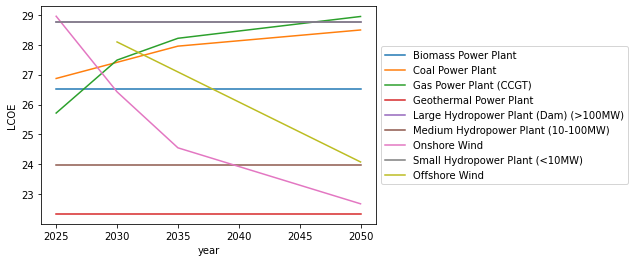

In [51]:
newcapa_grouped = newcapa_dropped.groupby(['year',"replacement_"]).mean().reset_index()
sns.lineplot(data=newcapa_grouped[newcapa_grouped.LCOE<30], x="year", y="LCOE", hue="replacement_")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

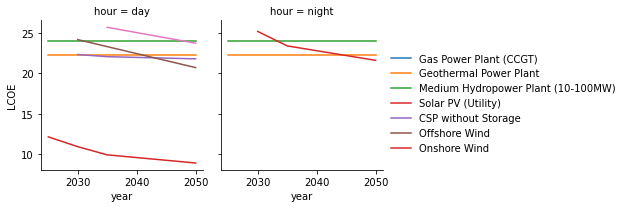

In [60]:
newcapa_grouped = newcapa_dropped.groupby(['year',"replacement_", "hour"]).mean().reset_index()

g = sns.FacetGrid(newcapa_grouped[newcapa_grouped.LCOE<26], col="hour")
g.map(sns.lineplot, "year", "LCOE", "replacement_")
g.add_legend()
plt.show()

autumn


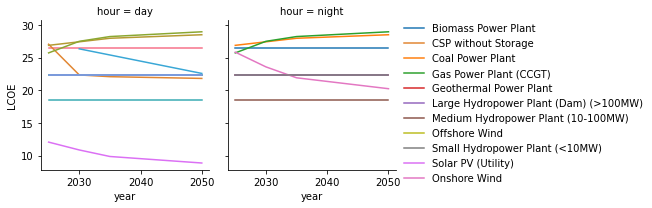

spring


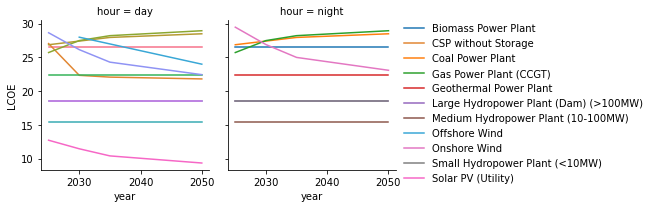

summer


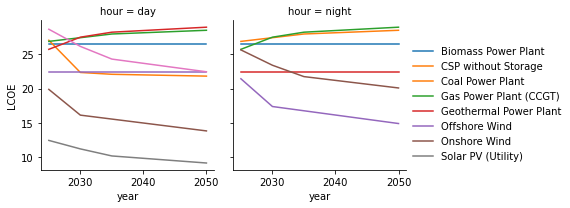

winter


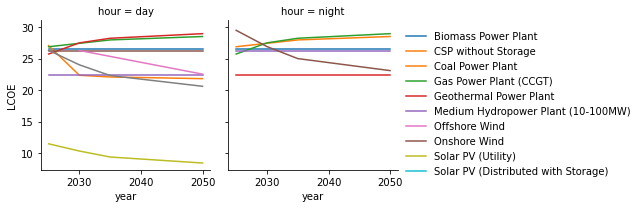

In [41]:
for timeslice, newcapa in newcapa_dropped.groupby(["month"]):
    print(timeslice)
    g = sns.FacetGrid(newcapa[newcapa.LCOE<30], col="hour")
    g.map(sns.lineplot, "year", "LCOE", "replacement_")
    g.add_legend()
    plt.show()